# IBM Applied Data Science Capstone Course by Coursera
#### _by Kunal Tale_
### Week 5 Final Project
_Opening of a Pizza Place near Mumbai's Tourist Places_  
- Build a dataframe of Tourist Places in Mumbai, India by web scraping the data from Wikipedia page
- Get the geographical coordinates of the Tourist Places
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods of the Tourist Places
- Select the best cluster to open Pizza Place

#### 1. Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import matplotlib.pyplot as plt
import seaborn as sns

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge geocoder --yes
import geocoder # to get coordinates

#!conda install -c conda-forge bs4 --yes
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


#### 2. Get Dataset

In [2]:
# send the GET request
data = requests.get("https://en.wikipedia.org/wiki/List_of_tourist_attractions_in_Mumbai").text
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(data, 'html5lib')

In [3]:
# create a list to store neighborhood data
TouristPlaceList = []
# append the data into the list
#for row in soup.find_all("div",class_="toc")[0].findAll("li"):
#    TouristPlaceList.append(row.text)
#for row in soup.find_all("ul")[2].findAll("li"):
#    TouristPlaceList.append(row.text)
#TouristPlaceList 2-14
for i in range(2,14):
    for row in soup.find_all("ul")[i].findAll("li"):
        TouristPlaceList.append(row.text)
TouristPlaceList = pd.DataFrame({"TouristPlace": TouristPlaceList})
TouristPlaceList.head()

,TouristPlace
0,Adlabs Imagica
1,Andheri Sports Complex
2,B.P.T. Ground
3,Bandra Kurla Complex Ground
4,Brabourne Stadium


In [4]:
TouristPlaceList.shape

(162, 1)

#### 3.Get Geo Coordinates

In [5]:
def get_latlng(TouristPlace):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(TouristPlace))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [6]:
# call the function to get the coordinates, store in a new list using list comprehension
coords = [ get_latlng(TouristPlace) for TouristPlace in TouristPlaceList["TouristPlace"].tolist() ]

In [7]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [8]:
# merge the coordinates into the original dataframe
TouristPlaceList['Latitude'] = df_coords['Latitude']
TouristPlaceList['Longitude'] = df_coords['Longitude']
# check the neighborhoods and the coordinates
print(TouristPlaceList.shape)
TouristPlaceList

(162, 3)


,TouristPlace,Latitude,Longitude
0,Adlabs Imagica,18.768290,73.282610
1,Andheri Sports Complex,19.128920,72.836290
2,B.P.T. Ground,19.017470,72.819200
3,Bandra Kurla Complex Ground,19.066840,72.861930
4,Brabourne Stadium,18.932580,72.823470
5,Colaba Woods,18.911520,72.819120
6,Cooperage Ground,18.924440,72.829580
7,Cross Maidan,18.939900,72.829850
8,Dadaji Kondadev Stadium,19.193170,72.980030
9,DY Patil Stadium,19.041350,73.027080


In [9]:
# save the DataFrame as CSV file
TouristPlaceList.to_csv("TouristPlaceList.csv", index=False)

#### 4. Create Map of Mumbai

In [10]:
# get the coordinates of Kuala Lumpur
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai, India {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mumbai, India 18.9387711, 72.8353355.


In [11]:
# create map of Toronto using latitude and longitude values
map_mi = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, TouristPlace in zip(TouristPlaceList['Latitude'], TouristPlaceList['Longitude'], TouristPlaceList['TouristPlace']):
    label = '{}'.format(TouristPlace)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mi)  
    
map_mi

In [12]:
# save the map as HTML file
map_mi.save('map_mi_1.html')

#### 5. Foursquare API to explore the neighborhoods of the Tourist places

Foursquare client ID

In [13]:

CLIENT_ID = 'IQWXXT1WH2U52DVWG13LSQX22K344UH5HKDSVBJGRTI3YCCO' # your Foursquare ID
CLIENT_SECRET = 'GOKQJXYUPICIKIXGNVQYYA1W2DSLFCHGZKRQX105IVHIBDSX' # your Foursquare Secret
VERSION = '20200315' # Foursquare API version


In [14]:
radius = 3000
LIMIT = 100

venues = []

for lat, long, TouristPlace in zip(TouristPlaceList['Latitude'], TouristPlaceList['Longitude'], TouristPlaceList['TouristPlace']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            TouristPlace,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [15]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['TouristPlace', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(13973, 7)


,TouristPlace,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Adlabs Imagica,18.76829,73.28261,Adlabs Imagica,18.767977,73.282027,Theme Park
1,Adlabs Imagica,18.76829,73.28261,Nitro,18.768260,73.281791,Theme Park Ride / Attraction
2,Adlabs Imagica,18.76829,73.28261,Adlabs Aquamagica,18.768281,73.282171,Water Park
3,Adlabs Imagica,18.76829,73.28261,Scream Machine,18.768881,73.281135,Theme Park Ride / Attraction
4,Adlabs Imagica,18.76829,73.28261,Mr. India,18.766420,73.280438,Indie Movie Theater


In [16]:
venues_df.groupby(["TouristPlace"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
TouristPlace,,,,,,
Capitol Cinema,8,8,8,8,8,8
National Gallery of Modern Art,100,100,100,100,100,100
Adlabs Imagica,12,12,12,12,12,12
Afghan Church,35,35,35,35,35,35
Aksa Beach,16,16,16,16,16,16
Andheri Sports Complex,100,100,100,100,100,100
Annapurna Studios,100,100,100,100,100,100
Antarang – Sex Health Information Art Gallery,100,100,100,100,100,100
B.P.T. Ground,56,56,56,56,56,56


Let's find out how many unique categories can be curated from all the returned venues

In [17]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 215 uniques categories.


In [18]:
# print out the list of categories
venues_df['VenueCategory'].unique()

array(['Theme Park', 'Theme Park Ride / Attraction', 'Water Park',
       'Indie Movie Theater', 'Indian Restaurant', 'American Restaurant',
       'Resort', 'Fast Food Restaurant', 'Breakfast Spot', 'Pizza Place',
       'Brewery', 'Multiplex', 'Falafel Restaurant',
       'Mediterranean Restaurant', 'Pub', 'Bakery', 'Café', 'Diner',
       'Mughlai Restaurant', 'Juice Bar', 'BBQ Joint', 'Lounge',
       "Women's Store", 'Ice Cream Shop', 'Coffee Shop', 'Bar',
       'Comfort Food Restaurant', 'Chinese Restaurant', 'Movie Theater',
       'Spa', 'Residential Building (Apartment / Condo)',
       'South Indian Restaurant', 'Jewelry Store', 'Gym',
       'Bengali Restaurant', 'Sandwich Place',
       'Vegetarian / Vegan Restaurant', 'Donut Shop', 'Dessert Shop',
       'Beach', 'Theater', 'Cupcake Shop', 'Italian Restaurant',
       'Cocktail Bar', 'Seafood Restaurant', 'Mexican Restaurant',
       'Hotel', 'French Restaurant', 'Scenic Lookout',
       'Athletics & Sports', 'Snack Place

In [19]:
# check if the results contain "Pizza Place"
"Pizza Place" in venues_df['VenueCategory'].unique()

True

In [20]:
VenueCategory_df=pd.DataFrame(venues_df['VenueCategory'].unique())
# save the DataFrame as CSV file
VenueCategory_df.to_csv("VenueCategory.csv", index=False)

#### 6. Analyze Each Tourist Place

In [21]:
# one hot encoding
TouristPlaceList_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TouristPlaceList_onehot['TouristPlace'] = venues_df['TouristPlace'] 

# move neighborhood column to the first column
fixed_columns = [TouristPlaceList_onehot.columns[-1]] + list(TouristPlaceList_onehot.columns[:-1])
TouristPlaceList_onehot = TouristPlaceList_onehot[fixed_columns]

print(TouristPlaceList_onehot.shape)
TouristPlaceList_onehot.head()

(13973, 216)


,TouristPlace,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Burrito Place,Bus Station,Café,Campground,Caribbean Restaurant,Cave,Chaat Place,Cheese Shop,Chinese Restaurant,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Punjabi Restaurant,Racetrack,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Adlabs Imagica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Adlabs Imagica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Adlabs Imagica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
TouristPlaceList_grouped = TouristPlaceList_onehot.groupby(["TouristPlace"]).mean().reset_index()

print(TouristPlaceList_grouped.shape)
TouristPlaceList_grouped

(161, 216)


,TouristPlace,Afghan Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Burrito Place,Bus Station,Café,Campground,Caribbean Restaurant,Cave,Chaat Place,Cheese Shop,Chinese Restaurant,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Punjabi Restaurant,Racetrack,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Track Stadium,Train Station,Vegetarian / Vegan Restaurant,Water Park,Waterfront,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Capitol Cinema,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.125000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.00

In [23]:
len(TouristPlaceList_grouped[TouristPlaceList_grouped["Pizza Place"] > 0])

133

In [24]:
TouristPlaceList_PizzPlace = TouristPlaceList_grouped[["TouristPlace","Pizza Place"]]
TouristPlaceList_PizzPlace.head()

,TouristPlace,Pizza Place
0,Capitol Cinema,0.000000
1,National Gallery of Modern Art,0.020000
2,Adlabs Imagica,0.000000
3,Afghan Church,0.028571
4,Aksa Beach,0.000000


#### 7. Cluster Tourist Place

In [25]:
columns_dont_want = ["TouristPlace"]
select = [x for x in TouristPlaceList_grouped.columns if x not in columns_dont_want]
X=TouristPlaceList_grouped.loc[:, select]

In [26]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [27]:
scores = [get_inertia(x) for x in range(2, 21)]

Text(0, 0.5, 'Error')

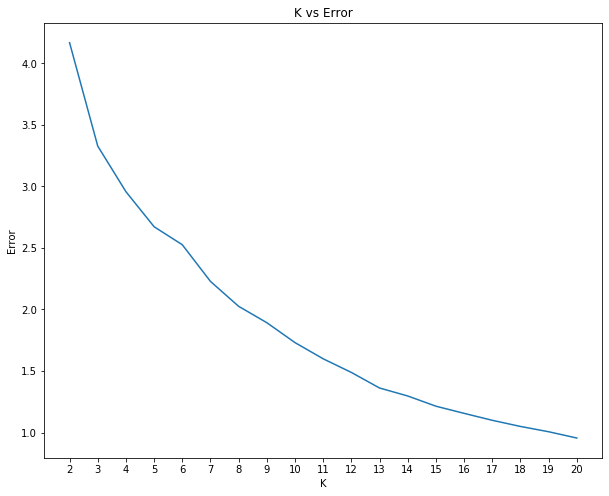

In [28]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

It is evident from the above plot that we have atleat 9 clusters in our data.

In [29]:
# set number of clusters
kclusters = 9

TouristPlaceList_clustering = TouristPlaceList_PizzPlace.drop(["TouristPlace"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TouristPlaceList_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 3, 4, 3, 4, 3, 5, 1, 1], dtype=int32)

In [30]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
TouristPlaceList_merged = TouristPlaceList_PizzPlace.copy()

# add clustering labels
TouristPlaceList_merged["Cluster Labels"] = kmeans.labels_

In [31]:
TouristPlaceList_merged.head()

,TouristPlace,Pizza Place,Cluster Labels
0,Capitol Cinema,0.000000,3
1,National Gallery of Modern Art,0.020000,1
2,Adlabs Imagica,0.000000,3
3,Afghan Church,0.028571,4
4,Aksa Beach,0.000000,3


In [32]:
# merge TouristPlaceList with TouristPlaceList_merge to add latitude/longitude for each neighborhood
TouristPlaceList_merged = TouristPlaceList_merged.join(TouristPlaceList.set_index("TouristPlace"), on="TouristPlace")

print(TouristPlaceList_merged.shape)
TouristPlaceList_merged.head() # check the last columns!

(162, 5)


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude
0,Capitol Cinema,0.000000,3,29.39041,79.45498
1,National Gallery of Modern Art,0.020000,1,18.94143,72.83232
2,Adlabs Imagica,0.000000,3,18.76829,73.28261
3,Afghan Church,0.028571,4,18.90654,72.81660
4,Aksa Beach,0.000000,3,19.17321,72.79674


Now let's create the new dataframe and display the top 10 venues for each Tourist Place.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['TouristPlace']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
TouristPlaceList_venues_sorted = pd.DataFrame(columns=columns)
TouristPlaceList_venues_sorted['TouristPlace'] = TouristPlaceList_grouped['TouristPlace']

for ind in np.arange(TouristPlaceList_grouped.shape[0]):
    row_categories = TouristPlaceList_grouped.iloc[ind, :].iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    TouristPlaceList_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(TouristPlaceList_venues_sorted.shape)
TouristPlaceList_venues_sorted.head()

(161, 11)


,TouristPlace,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Capitol Cinema,Hotel,Indian Restaurant,Road,Lake,Bakery,City,Coffee Shop,Flea Market,Deli / Bodega,Donut Shop
1,National Gallery of Modern Art,Indian Restaurant,Ice Cream Shop,Café,Hotel,Fast Food Restaurant,Bar,Bakery,Chinese Restaurant,Coffee Shop,Cricket Ground
2,Adlabs Imagica,Theme Park Ride / Attraction,Fast Food Restaurant,Resort,Theme Park,Breakfast Spot,Water Park,American Restaurant,Indie Movie Theater,Indian Restaurant,Donut Shop
3,Afghan Church,Hotel,Café,Dessert Shop,Diner,Spa,Boutique,Lounge,Seafood Restaurant,Scenic Lookout,Fast Food Restaurant
4,Aksa Beach,Beach,Boat or Ferry,Hotel,Resort,Bakery,Pier,Harbor / Marina,Hotel Pool,Gym Pool,Dim Sum Restaurant


In [34]:
# merge TouristPlaceList with TouristPlaceList_merge to add latitude/longitude for each neighborhood
TouristPlaceList_merged = TouristPlaceList_merged.join(TouristPlaceList_venues_sorted.set_index("TouristPlace"), on="TouristPlace")

print(TouristPlaceList_merged.shape)


(162, 15)


In [35]:
TouristPlaceList_merged.reset_index(inplace = False) 
TouristPlaceList_merged.head()

,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Capitol Cinema,0.000000,3,29.39041,79.45498,Hotel,Indian Restaurant,Road,Lake,Bakery,City,Coffee Shop,Flea Market,Deli / Bodega,Donut Shop
1,National Gallery of Modern Art,0.020000,1,18.94143,72.83232,Indian Restaurant,Ice Cream Shop,Café,Hotel,Fast Food Restaurant,Bar,Bakery,Chinese Restaurant,Coffee Shop,Cricket Ground
2,Adlabs Imagica,0.000000,3,18.76829,73.28261,Theme Park Ride / Attraction,Fast Food Restaurant,Resort,Theme Park,Breakfast Spot,Water Park,American Restaurant,Indie Movie Theater,Indian Restaurant,Donut Shop
3,Afghan Church,0.028571,4,18.90654,72.81660,Hotel,Café,Dessert Shop,Diner,Spa,Boutique,Lounge,Seafood Restaurant,Scenic Lookout,Fast Food Restaurant
4,Aksa Beach,0.000000,3,19.17321,72.79674,Beach,Boat or Ferry,Hotel,Resort,Bakery,Pier,Harbor / Marina,Hotel Pool,Gym Pool,Dim Sum Restaurant


#### Finally, let's visualize the resulting clusters

In [36]:
# get the coordinates of Kuala Lumpur
address = 'Bandra, Mumbai, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TouristPlaceList_merged['Latitude'], TouristPlaceList_merged['Longitude'], TouristPlaceList_merged['TouristPlace'], TouristPlaceList_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

#### 8. Examine Clusters

Cluster 1

In [38]:
C1=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 0]
print(C1['TouristPlace'].count())
C1.reset_index(drop=True, inplace=True)
C1

4


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dadaji Kondadev Stadium,0.060000,0,19.19317,72.98003,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Pizza Place,Ice Cream Shop,Seafood Restaurant,Hotel,Multiplex,Chinese Restaurant,Italian Restaurant
1,Growel's 101,0.060000,0,19.20224,72.86145,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Café,Pizza Place,Ice Cream Shop,Lounge,Restaurant,Snack Place,Department Store
2,Metro Junction Mall,0.071429,0,19.22958,73.12400,Fast Food Restaurant,Pizza Place,Indian Restaurant,Scenic Lookout,Beach,Tennis Court,Café,Electronics Store,Lounge,Chinese Restaurant
3,"Raghuleela Mall, Kandivili",0.060000,0,19.21289,72.84931,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Restaurant,Café,Chinese Restaurant,Lounge,Coffee Shop,Electronics Store


1st most common place in Cluster 1 is Indian Restaurant

In [39]:
count=0
if ('Pizza Place' in C1.iloc[:,5:].values):
    for x in range(5,14):
        count=C1.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

4

In cluster 1, Pizza Place is not present in top 10 venue list

Cluster 2

In [40]:
C2=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 1]
print(C2['TouristPlace'].count())
C2.reset_index(drop=True, inplace=True)
C2

63


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,National Gallery of Modern Art,0.020000,1,18.941430,72.832320,Indian Restaurant,Ice Cream Shop,Café,Hotel,Fast Food Restaurant,Bar,Bakery,Chinese Restaurant,Coffee Shop,Cricket Ground
1,B.P.T. Ground,0.017857,1,19.017470,72.819200,Indian Restaurant,Hotel,Italian Restaurant,Restaurant,Lounge,Shopping Mall,Hotel Bar,Ice Cream Shop,Scenic Lookout,Beach
2,Babulnath,0.020000,1,18.956650,72.808630,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Restaurant,Dessert Shop,Juice Bar,Bakery,Snack Place,Gastropub,Park
3,Bassein Fort,0.020000,1,18.932250,72.832870,Indian Restaurant,Hotel,Café,Bar,Ice Cream Shop,Cricket Ground,Coffee Shop,Chinese Restaurant,Asian Restaurant,Restaurant
4,Belapur Fort,0.020000,1,18.932250,72.832870,Indian Restaurant,Hotel,Café,Bar,Ice Cream Shop,Cricket Ground,Coffee Shop,Chinese Restaurant,Asian Restaurant,Restaurant
5,Bombay Castle,0.020000,1,18.931080,72.838700,Indian Restaurant,Café,Hotel,Bar,Ice Cream Shop,Cricket Ground,Coffee Shop,Chinese Restaurant,Asian Restaurant,Breakfast Spot
6,Chhatrapati Shivaji Maharaj Vastu Sangrahalaya,0.023256,1,18.926490,72.831510,Indian Restaurant,Hotel,Café,Ice Cream Shop,Bakery,Bar,Fast Food Restaurant,Cricket Ground,Dessert Shop,Harbor / Marina
7,"Church of Our Lady of Mount Carmel, Bandra",0.020000,1,19.046550,72.822260,Indian Restaurant,Bakery,Café,Dessert Shop,Lounge,Italian Restaurant,Scenic Lookout,Ice Cream Shop,Deli / Bodega,Seafood Restaurant
8,Colaba Woods,0.020000,1,18.911520,72.819120,Indian Restaurant,Café,Hotel,Asian Restaurant,Bar,Coffee Shop,Japanese Restaurant,Italian Restaurant,Dessert Shop,Mediterranean Restaurant
9,Cooperage Ground,0.024096,1,18.924440,72.829580,Indian Restaurant,Hotel,Café,Ice Cream Shop,Bakery,Bar,Fast Food Restaurant,Dessert Shop,Restaurant,Diner


Cluster 2 has Fast Food Restaurants as 2nd Most Common Venue

In [41]:
count=0
if ('Pizza Place' in C2.iloc[:,5:].values):
    for x in range(5,14):
        count=C2.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

1

Pizza Place is present as one of the 10 Most Common Places near the Tourist Place

Cluster 3

In [42]:
C3=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 2]
print(C3['TouristPlace'].count())
C3.reset_index(drop=True, inplace=True)
C3

1


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Watson's Hotel,0.2,2,29.93151,73.87259,Food,Train Station,Shop & Service,Food Court,Pizza Place,Gym Pool,Dhaba,Farmers Market,History Museum,Farm


In [43]:
count=0
if ('Pizza Place' in C3.iloc[:,5:].values):
    for x in range(5,14):
        count=C3.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

1

Pizza Place is present as the 1st most Common venue near the Tourist Place

Cluster 4

In [44]:
C4=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 3]
print(C4['TouristPlace'].count())
C4.reset_index(drop=True, inplace=True)
C4

28


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Capitol Cinema,0.0,3,29.390410,79.454980,Hotel,Indian Restaurant,Road,Lake,Bakery,City,Coffee Shop,Flea Market,Deli / Bodega,Donut Shop
1,Adlabs Imagica,0.0,3,18.768290,73.282610,Theme Park Ride / Attraction,Fast Food Restaurant,Resort,Theme Park,Breakfast Spot,Water Park,American Restaurant,Indie Movie Theater,Indian Restaurant,Donut Shop
2,Aksa Beach,0.0,3,19.173210,72.796740,Beach,Boat or Ferry,Hotel,Resort,Bakery,Pier,Harbor / Marina,Hotel Pool,Gym Pool,Dim Sum Restaurant
3,Annapurna Studios,0.0,3,19.104661,72.853322,Indian Restaurant,Hotel,Coffee Shop,Lounge,Seafood Restaurant,Ice Cream Shop,Café,Sandwich Place,Fast Food Restaurant,Chinese Restaurant
4,Bombay Talkies,0.0,3,18.961810,72.820280,Indian Restaurant,Restaurant,Dessert Shop,Café,Bar,Coffee Shop,Park,Ice Cream Shop,Bakery,Fast Food Restaurant
5,Castella de Aguada,0.0,3,15.516670,73.766670,Restaurant,Seafood Restaurant,Hotel,Asian Restaurant,Resort,Indian Restaurant,Café,Italian Restaurant,Beach,Lighthouse
6,Dadasaheb Phalke Chitranagari,0.0,3,19.159540,72.884730,Hotel,Indian Restaurant,Fast Food Restaurant,Farm,Gym,Café,Restaurant,Event Space,Multiplex,Resort
7,Dongri Fort,0.0,3,18.960210,72.837720,Indian Restaurant,Café,Coffee Shop,History Museum,Hotel,Ice Cream Shop,Chinese Restaurant,Restaurant,Juice Bar,Irani Cafe
8,Elephanta Caves,0.0,3,18.963270,72.932130,Cave,Historic Site,Harbor / Marina,Boat or Ferry,Zoo,Diner,Fish Market,Fast Food Restaurant,Farmers Market,Farm
9,Irani café,0.0,3,18.961020,72.837030,Indian Restaurant,Café,History Museum,Coffee Shop,Hotel,Bar,Juice Bar,Irani Cafe,Train Station,Ice Cream Shop


In [45]:
count=0
if ('Pizza Place' in C4.iloc[:,5:].values):
    for x in range(5,14):
        count=C4.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

0

Pizza Place is present as one of the top 10 common venues near 12 of the 28 Tourist places in cluster 4

Cluster 5

In [46]:
C5=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 4]
print(C5['TouristPlace'].count())
C5.reset_index(drop=True, inplace=True)
C5

28


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Afghan Church,0.028571,4,18.906540,72.816600,Hotel,Café,Dessert Shop,Diner,Spa,Boutique,Lounge,Seafood Restaurant,Scenic Lookout,Fast Food Restaurant
1,Andheri Sports Complex,0.030000,4,19.128920,72.836290,Indian Restaurant,Pub,Ice Cream Shop,Café,Chinese Restaurant,Italian Restaurant,Bar,Pizza Place,Bakery,Juice Bar
2,Brabourne Stadium,0.030000,4,18.932580,72.823470,Indian Restaurant,Hotel,Ice Cream Shop,Fast Food Restaurant,Café,Bakery,Chinese Restaurant,Pizza Place,Coffee Shop,Dessert Shop
3,Cafe Mondegar,0.025641,4,18.924180,72.832080,Indian Restaurant,Hotel,Café,Ice Cream Shop,Bakery,Bar,Diner,Scenic Lookout,Chinese Restaurant,Coffee Shop
4,Cathedral of the Holy Name,0.025974,4,18.923480,72.830210,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Bar,Diner,Scenic Lookout,Chinese Restaurant,Coffee Shop
5,"Church of Our Lady of Dolours, Wadala",0.030000,4,19.019090,72.856090,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Snack Place,Fast Food Restaurant,Movie Theater,Pizza Place,Dessert Shop,Vegetarian / Vegan Restaurant
6,Church of Our Lady of Good Counsel & Shrine of...,0.030000,4,19.045890,72.863620,Indian Restaurant,Bar,Chinese Restaurant,Café,Dessert Shop,Ice Cream Shop,Pizza Place,Hotel,Italian Restaurant,Juice Bar
7,Colaba Causeway,0.025316,4,18.924493,72.832157,Indian Restaurant,Hotel,Café,Ice Cream Shop,Bakery,Bar,Diner,Scenic Lookout,Chinese Restaurant,Coffee Shop
8,DY Patil Stadium,0.034483,4,19.041350,73.027080,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Train Station,Café,Bakery,Scenic Lookout,Diner,Pizza Place,Chinese Restaurant
9,Eros Cinema,0.030000,4,18.932370,72.827830,Indian Restaurant,Café,Hotel,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Dessert Shop,Bakery,Diner


In [47]:
count=0
if ('Pizza Place' in C5.iloc[:,5:].values):
    for x in range(5,14):
        count=C5.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

12

Pizza Place is present as one of the top 10 venue places in only 2 of the 63 tourist place in cluster 5

Cluster 6

In [48]:
C6=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 5]
print(C6['TouristPlace'].count())
C6.reset_index(drop=True, inplace=True)
C6

21


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Antarang – Sex Health Information Art Gallery,0.010000,5,19.031150,72.843850,Indian Restaurant,Café,Chinese Restaurant,Snack Place,Ice Cream Shop,Beach,Fast Food Restaurant,Dessert Shop,Gourmet Shop,Tea Room
1,Bandra Talao,0.010000,5,19.055510,72.837600,Indian Restaurant,Chinese Restaurant,Café,Seafood Restaurant,Coffee Shop,Bakery,Ice Cream Shop,Dessert Shop,Lounge,Scenic Lookout
2,Chor Bazaar,0.010000,5,18.959950,72.829600,Indian Restaurant,Ice Cream Shop,Bar,Restaurant,Dessert Shop,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Beach,Irani Cafe
3,"Church of Our Lady of Health, Cavel",0.010000,5,18.949000,72.827770,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Restaurant,Bakery,Cricket Ground,Dessert Shop,Juice Bar,Hotel
4,Gloria Church,0.010000,5,18.975570,72.834360,Indian Restaurant,Restaurant,Bar,Bakery,Ice Cream Shop,Café,Dessert Shop,BBQ Joint,Hotel,Fast Food Restaurant
5,Grand Hyatt Mumbai,0.010000,5,19.076710,72.850820,Indian Restaurant,Hotel,Café,Bar,Lounge,Seafood Restaurant,Dessert Shop,Italian Restaurant,Coffee Shop,Ice Cream Shop
6,Inorbit Mall,0.010000,5,19.172860,72.836100,Coffee Shop,Indian Restaurant,Clothing Store,Multiplex,Fast Food Restaurant,Café,Donut Shop,Lounge,Bar,Italian Restaurant
7,Jivdani Mata,0.010000,5,19.015200,72.844850,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Lounge,Movie Theater,Fast Food Restaurant,Coffee Shop,Dessert Shop,Restaurant
8,Kohinoor Square,0.010000,5,19.024680,72.840820,Indian Restaurant,Café,Chinese Restaurant,Ice Cream Shop,Fast Food Restaurant,Movie Theater,Dessert Shop,Coffee Shop,Juice Bar,Beach
9,Linking Road,0.010000,5,19.074040,72.834480,Indian Restaurant,Café,Bakery,Dessert Shop,Seafood Restaurant,Lounge,Ice Cream Shop,Cupcake Shop,Bar,Italian Restaurant


In [49]:
count=0
if ('Pizza Place' in C6.iloc[:,5:].values):
    for x in range(5,14):
        count=C6.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

0

Pizza place is not present as one of the top 10 common venue in cluster 6 tourist places

cluster 7

In [50]:
C7=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 6]
print(C7['TouristPlace'].count())
C7.reset_index(drop=True, inplace=True)
C7

11


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Crossroads Mall,0.038462,6,30.332510,78.053920,Fast Food Restaurant,Café,Flea Market,Train Station,Coffee Shop,Indian Restaurant,Tea Room,Shopping Mall,Sandwich Place,Burger Joint
1,EsselWorld,0.041667,6,19.231350,72.805180,Café,Water Park,Restaurant,Theme Park,Coffee Shop,Indian Restaurant,Bridge,Fast Food Restaurant,Resort,Pub
2,Kanheri Caves,0.040000,6,19.231500,72.863750,Indian Restaurant,Café,Ice Cream Shop,Chinese Restaurant,Gym,Restaurant,Fast Food Restaurant,Pizza Place,Lounge,Sandwich Place
3,Middle Income Group Club Ground,0.040000,6,19.060872,72.896277,Indian Restaurant,Bar,Fast Food Restaurant,Coffee Shop,Café,Pizza Place,Vegetarian / Vegan Restaurant,Restaurant,Chinese Restaurant,Dessert Shop
4,Neptune Magnet Mall,0.043478,6,19.141470,72.931920,Indian Restaurant,Café,Train Station,Coffee Shop,Fast Food Restaurant,Pizza Place,Department Store,Restaurant,Bus Station,Pub
5,Our Lady of Egypt Church,0.040000,6,19.078120,72.869030,Indian Restaurant,Hotel,Coffee Shop,Bar,Italian Restaurant,Lounge,Chinese Restaurant,Pizza Place,Café,Restaurant
6,Ramdev Film Ciity,0.040000,6,19.139240,72.833570,Indian Restaurant,Café,Multiplex,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Pub,Sandwich Place,Gym / Fitness Center,Bar
7,Royal Opera House,0.040000,6,18.956250,72.815760,Indian Restaurant,Ice Cream Shop,Restaurant,Fast Food Restaurant,Juice Bar,Pizza Place,Bakery,Dessert Shop,Cricket Ground,Gastropub
8,Shaneshwar Sansthan,0.040000,6,19.053600,72.885380,Indian Restaurant,Bar,Lounge,Café,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Snack Place,Coffee Shop,Dessert Shop
9,Viviana Mall,0.035714,6,19.208160,72.972180,Indian Restaurant,Dessert Shop,Donut Shop,Pub,Coffee Shop,Chinese Restaurant,Clothing Store,Department Store,Pizza Place,Italian Restaurant


In [51]:
count=0
if ('Pizza Place' in C7.iloc[:,5:].values):
    for x in range(5,14):
        count=C7.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

9

Pizza Place is present as one of the top 10 most common venues in all of the cluster 7 tourist places

Cluster 8

In [52]:
C8=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 7]
print(C8['TouristPlace'].count())
C8.reset_index(drop=True, inplace=True)
C8

1


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Our Lady of Immaculate Conception Church, Mt. ...",0.090909,7,19.23443,72.78212,Beach,Resort,Hotel,Pizza Place,Water Park,Theme Park,Indian Restaurant,Dumpling Restaurant,Diner,Donut Shop


In [53]:
count=0
if ('Pizza Place' in C8.iloc[:,5:].values):
    for x in range(5,14):
        count=C8.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

1

Pizza Place is present as one of the top 10 most common place in 9 of the 12 tourist places in cluster 8

Cluster 9

In [54]:
C9=TouristPlaceList_merged.loc[TouristPlaceList_merged['Cluster Labels'] == 8]
print(C9['TouristPlace'].count())
C9.reset_index(drop=True, inplace=True)
C9

5


,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bandra Kurla Complex Ground,0.050000,8,19.066840,72.86193,Indian Restaurant,Bar,Hotel,Pizza Place,Café,Coffee Shop,Dessert Shop,Lounge,Italian Restaurant,Chinese Restaurant
1,Jijamata Udyaan,0.050000,8,19.120991,72.85619,Indian Restaurant,Hotel,Ice Cream Shop,Pizza Place,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Lounge,Fast Food Restaurant,Seafood Restaurant
2,Mahakali Caves,0.046875,8,19.130300,72.87298,Indian Restaurant,Hotel,Restaurant,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Pizza Place,Asian Restaurant,Italian Restaurant,Bus Station
3,R. K. Studio,0.054945,8,19.046790,72.90721,Indian Restaurant,Fast Food Restaurant,Pizza Place,Gym / Fitness Center,Chinese Restaurant,Café,Coffee Shop,Lounge,Bar,Ice Cream Shop
4,Sanjay Gandhi National Park,0.054054,8,19.166710,72.92988,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Snack Place,Ice Cream Shop,Multiplex,Clothing Store,Coffee Shop,Mountain


In [55]:
count=0
if ('Pizza Place' in C9.iloc[:,5:].values):
    for x in range(5,14):
        count=C9.iloc[:,x].str.count("Pizza Place").sum()+count
        
count

5

Pizza Place is present as one of the top 10 most common places in all the 3 tourist places in cluster 9

In [56]:
cluster_df=pd.DataFrame({'Cluster':['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9'],
                        'Total Tourist Places':[C1['TouristPlace'].count(),C2['TouristPlace'].count(),C3['TouristPlace'].count(),C4['TouristPlace'].count(),C5['TouristPlace'].count(),C6['TouristPlace'].count(),C7['TouristPlace'].count(),C8['TouristPlace'].count(),C9['TouristPlace'].count()]})

In [57]:
cluster_df.head()

,Cluster,Total Tourist Places
0,Cluster 1,4
1,Cluster 2,63
2,Cluster 3,1
3,Cluster 4,28
4,Cluster 5,28


In [58]:
def clust_Tname(clsut_para):
    c=""
    for x in range(0,len(clsut_para)-1):
        if x==0:
            c=clsut_para.iloc[x,0]
        else:
            c=clsut_para.iloc[x,0]+' ; '+c
    return(c)


In [59]:
cluster_df['Tourist Places']=[clust_Tname(C1),clust_Tname(C2),clust_Tname(C3),clust_Tname(C4),clust_Tname(C5),clust_Tname(C6),clust_Tname(C7),clust_Tname(C8),clust_Tname(C9)]

In [60]:
def clust_count(clust_para):
    count=0
    if ('Pizza Place' in clust_para.iloc[:,5:].values):
        for x in range(5,14):
            count=clust_para.iloc[:,x].str.count("Pizza Place").sum()+count
    return(count)

In [61]:
cluster_df['Presence of Pizza Place']= [clust_count(C1),clust_count(C2),clust_count(C3),clust_count(C4),clust_count(C5),clust_count(C6),clust_count(C7),clust_count(C8),clust_count(C9)]

In [62]:
cluster_df['%Presence of Pizza Place']=(cluster_df['Presence of Pizza Place']/cluster_df['Total Tourist Places'])*100

In [63]:
cluster_df

,Cluster,Total Tourist Places,Tourist Places,Presence of Pizza Place,%Presence of Pizza Place
0,Cluster 1,4,Metro Junction Mall ; Growel's 101 ; Dadaji Ko...,4,100.000000
1,Cluster 2,63,Wadia Movietone ; Vasai Fort ; Tulshi Dam ; St...,1,1.587302
2,Cluster 3,1,,1,100.000000
3,Cluster 4,28,Tulsi Lake ; St. John the Baptist Church ; St....,0,0.000000
4,Cluster 5,28,The Table ; Sewri Fort ; Regal Cinema ; Raghul...,12,42.857143
5,Cluster 6,21,Wagheshwari Temple ; Vihar Lake ; Sterling Cin...,0,0.000000
6,Cluster 7,11,Viviana Mall ; Shaneshwar Sansthan ; Royal Ope...,9,81.818182
7,Cluster 8,1,,1,100.000000
8,Cluster 9,5,R. K. Studio ; Mahakali Caves ; Jijamata Udyaa...,5,100.000000


In [64]:
cluster_df['Viable Option'] = ['Yes' if x >= 33.33 else 'No' for x in cluster_df['%Presence of Pizza Place']]

In [65]:
cluster_df

,Cluster,Total Tourist Places,Tourist Places,Presence of Pizza Place,%Presence of Pizza Place,Viable Option
0,Cluster 1,4,Metro Junction Mall ; Growel's 101 ; Dadaji Ko...,4,100.000000,Yes
1,Cluster 2,63,Wadia Movietone ; Vasai Fort ; Tulshi Dam ; St...,1,1.587302,No
2,Cluster 3,1,,1,100.000000,Yes
3,Cluster 4,28,Tulsi Lake ; St. John the Baptist Church ; St....,0,0.000000,No
4,Cluster 5,28,The Table ; Sewri Fort ; Regal Cinema ; Raghul...,12,42.857143,Yes
5,Cluster 6,21,Wagheshwari Temple ; Vihar Lake ; Sterling Cin...,0,0.000000,No
6,Cluster 7,11,Viviana Mall ; Shaneshwar Sansthan ; Royal Ope...,9,81.818182,Yes
7,Cluster 8,1,,1,100.000000,Yes
8,Cluster 9,5,R. K. Studio ; Mahakali Caves ; Jijamata Udyaa...,5,100.000000,Yes


Only 6 Cluster are viable option to start a Pizza Palace outlet as per business requirement

In [66]:
cluster_df=cluster_df.reset_index()

In [67]:
cluster_df.rename(columns = {'index':'Cluster Labels'}, inplace = True)
cluster_df

,Cluster Labels,Cluster,Total Tourist Places,Tourist Places,Presence of Pizza Place,%Presence of Pizza Place,Viable Option
0,0,Cluster 1,4,Metro Junction Mall ; Growel's 101 ; Dadaji Ko...,4,100.000000,Yes
1,1,Cluster 2,63,Wadia Movietone ; Vasai Fort ; Tulshi Dam ; St...,1,1.587302,No
2,2,Cluster 3,1,,1,100.000000,Yes
3,3,Cluster 4,28,Tulsi Lake ; St. John the Baptist Church ; St....,0,0.000000,No
4,4,Cluster 5,28,The Table ; Sewri Fort ; Regal Cinema ; Raghul...,12,42.857143,Yes
5,5,Cluster 6,21,Wagheshwari Temple ; Vihar Lake ; Sterling Cin...,0,0.000000,No
6,6,Cluster 7,11,Viviana Mall ; Shaneshwar Sansthan ; Royal Ope...,9,81.818182,Yes
7,7,Cluster 8,1,,1,100.000000,Yes
8,8,Cluster 9,5,R. K. Studio ; Mahakali Caves ; Jijamata Udyaa...,5,100.000000,Yes


### Plot Map of Viable Clusters

Data Set modification for Map generation

In [68]:
dump=cluster_df[['Cluster Labels','%Presence of Pizza Place','Viable Option']]
PizzaPlace_TouristList = TouristPlaceList_merged.join(dump.set_index("Cluster Labels"), on="Cluster Labels")
PizzaPlace_TouristList = PizzaPlace_TouristList[PizzaPlace_TouristList['Viable Option']=='Yes']
PizzaPlace_TouristList.reset_index(drop=True, inplace=True)
PizzaPlace_TouristList

,TouristPlace,Pizza Place,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,%Presence of Pizza Place,Viable Option
0,Afghan Church,0.028571,4,18.906540,72.816600,Hotel,Café,Dessert Shop,Diner,Spa,Boutique,Lounge,Seafood Restaurant,Scenic Lookout,Fast Food Restaurant,42.857143,Yes
1,Andheri Sports Complex,0.030000,4,19.128920,72.836290,Indian Restaurant,Pub,Ice Cream Shop,Café,Chinese Restaurant,Italian Restaurant,Bar,Pizza Place,Bakery,Juice Bar,42.857143,Yes
2,Bandra Kurla Complex Ground,0.050000,8,19.066840,72.861930,Indian Restaurant,Bar,Hotel,Pizza Place,Café,Coffee Shop,Dessert Shop,Lounge,Italian Restaurant,Chinese Restaurant,100.000000,Yes
3,Brabourne Stadium,0.030000,4,18.932580,72.823470,Indian Restaurant,Hotel,Ice Cream Shop,Fast Food Restaurant,Café,Bakery,Chinese Restaurant,Pizza Place,Coffee Shop,Dessert Shop,42.857143,Yes
4,Cafe Mondegar,0.025641,4,18.924180,72.832080,Indian Restaurant,Hotel,Café,Ice Cream Shop,Bakery,Bar,Diner,Scenic Lookout,Chinese Restaurant,Coffee Shop,42.857143,Yes
5,Cathedral of the Holy Name,0.025974,4,18.923480,72.830210,Indian Restaurant,Café,Hotel,Ice Cream Shop,Bakery,Bar,Diner,Scenic Lookout,Chinese Restaurant,Coffee Shop,42.857143,Yes
6,"Church of Our Lady of Dolours, Wadala",0.030000,4,19.019090,72.856090,Indian Restaurant,Ice Cream Shop,Café,Chinese Restaurant,Snack Place,Fast Food Restaurant,Movie Theater,Pizza Place,Dessert Shop,Vegetarian / Vegan Restaurant,42.857143,Yes
7,Church of Our Lady of Good Counsel & Shrine of...,0.030000,4,19.045890,72.863620,Indian Restaurant,Bar,Chinese Restaurant,Café,Dessert Shop,Ice Cream Shop,Pizza Place,Hotel,Italian Restaurant,Juice Bar,42.857143,Yes
8,Colaba Causeway,0.025316,4,18.924493,72.832157,Indian Restaurant,Hotel,Café,Ice Cream Shop,Bakery,Bar,Diner,Scenic Lookout,Chinese Restaurant,Coffee Shop,42.857143,Yes
9,Crossroads Mall,0.038462,6,30.332510,78.053920,Fast Food Restaurant,Café,Flea Market,Train Station,Coffee Shop,Indian Restaurant,Tea Room,Shopping Mall,Sandwich Place,Burger Joint,81.818182,Yes


In [69]:
# get the coordinates of Kuala Lumpur
address = 'Bandra, Mumbai, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_pizza_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,perc in zip(PizzaPlace_TouristList['Latitude'], PizzaPlace_TouristList['Longitude'], PizzaPlace_TouristList['TouristPlace'], PizzaPlace_TouristList['Cluster Labels'], PizzaPlace_TouristList['%Presence of Pizza Place']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster+1) + ' -- '+str(perc)+'% Pizza Place CLuster', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_pizza_clusters)
       
map_pizza_clusters

In [70]:
# save the map as HTML file
map_pizza_clusters.save('map_pizza_clusters.html')

#### 9. Observations

We got a glimpse of the Pizza Places in Mumbai around its Tourist Destinations and were able to find out some interesting insights which might be useful to a Pizza Place firm looking for expansion in Mumbai City as well as people with business interests. Let's summarize our findings:

- The Tourist destination in Mumbai are classified under 9 Clusters
- 6 of the 9 Clusters have Pizzza Places as significant contribution as one of its top 10 most common venues near their Tourist Places
- Cluster 4 (light blue) has the highest number of neighborhood popularity in Pizza Places followed by Cluster 8 (orange)
- Cluster 2 (purple) is located with long distant Tourist places and all of them have Pizza Places as one of the most popular venue of attraction near the tourist place   
- Cluster 9 (red) and Cluster 7 (light green) had low number of Tourist places but they still have a great popularity for Pizza Places near its tourist places

Lastly, Pizza Places firms are advised to focus on neighborhoods in cluster 4 and Cluster 8 which already have high concentration of Tourist places hence more footfall can be anticipated thought it will have an intense competition due to its popularity for Pizza. The interested Pizza Place firm is advised to maintain high quality standards and wider menu options to attract more customers and grow its business.